In [58]:
import json

# handle = open('values.txt', 'r')
# data = json.load(handle)
# handle.close()

# print(len(data))

# iass = [k['indicated_airspeed'] for k in data]
# vsis = [k['vertical_airspeed'] for k in data]

data = None
with open('params.txt', 'r') as handle:
    data = json.load(handle)
    for k, v in data.items():
        print(k, len(v))
    
    iass = data['IAS']
    vsis = data['VSI']
    ctrs = data['CTR']
    hdgs = data['HDG']
        

HDG 3362
CTR 3362
IAS 3796
VSI 3796


In [35]:
import math

def roundup(x, step):
    return int(math.ceil(x / step)) * step

def rounddown(x, step):
    return int(math.floor(x / step)) * step

In [103]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np

params = {
    'axes.labelsize': 'x-large',
    'axes.titlesize': 'x-large',
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large',
}

pylab.rcParams.update(params)

def make_histogram(data, step, filename, xlabel, ylabel='Probability Density', title='', num_bins=75):
    mu = np.mean(data)
    sigma = np.std(data, ddof=1)

    print(mu, sigma)

    fig, ax = plt.subplots()

    # histogram
    n, bins, patches = ax.hist(data, num_bins, density=1)

    print(len(bins))

    # 'best fit' line
    y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
    ax.plot(bins, y, '--', color='red')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    
    start, end = rounddown(min(data), step), roundup(max(data), step)
    plt.xticks(np.arange(start, end, step))
    print(start, end)

    fig.tight_layout()
    fig.savefig(filename, dpi=300, format='png')
    plt.show()

64.40127766069547 4.534888688369468
76
50.0 90.0


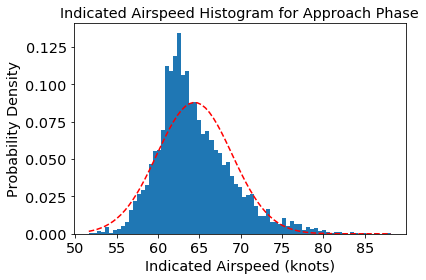

In [104]:
make_histogram(iass, 5.0, 'ias_hist.png', 'Indicated Airspeed (knots)', title='Indicated Airspeed Histogram for Approach Phase')

-364.52825079030555 181.20961137418584
76
-2000.0 500.0


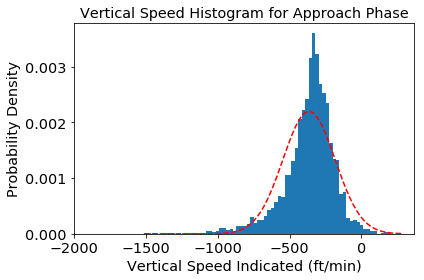

In [105]:
make_histogram(vsis, 500.0, 'vsi_hist.png', 'Vertical Speed Indicated (ft/min)', title='Vertical Speed Histogram for Approach Phase')

-4.541815124994322 15.499232022998418
76
-140.0 140.0


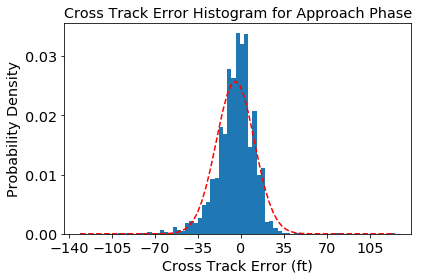

In [106]:
make_histogram(ctrs, 35.0, 'cross_track_hist.png', 'Cross Track Error (ft)', num_bins=75, title='Cross Track Error Histogram for Approach Phase')

1.9580249851278992 4.760696485624347
51
-20.0 20.0


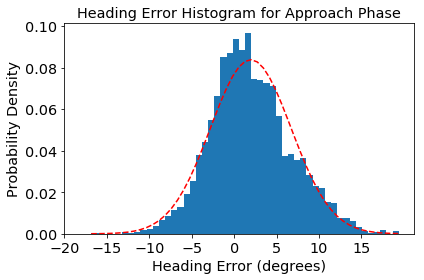

In [108]:
make_histogram(hdgs, 5.0, 'heading_hist.png', 'Heading Error (degrees)', num_bins=50, title='Heading Error Histogram for Approach Phase')